In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [13]:
np.random.seed(42)

# Get the number of samples
num_samples = len(x)

# Shuffle indices
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Calculate the index to split the data into training and testing sets
split_index = int(0.8 * num_samples)

# Split the data
x_train, x_test = x[indices[:split_index]], x[indices[split_index:]]
y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

# Checking the shapes of the training and testing sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (142, 13)
y_train shape: (142,)
x_test shape: (36, 13)
y_test shape: (36,)


In [14]:
mean_values = np.mean(x_train, axis=0)
std_dev_values = np.std(x_train, axis=0)
x_train_standardized = (x_train - mean_values) / std_dev_values
x_test_standardized = (x_test - mean_values) / std_dev_values
print("x_train_standardized shape:", x_train_standardized.shape)
print("x_test_standardized shape:", x_test_standardized.shape)


x_train_standardized shape: (142, 13)
x_test_standardized shape: (36, 13)


In [15]:
x_train_standardized

array([[ 0.76612803,  0.64398607,  0.71954557, ..., -0.02867826,
         1.05379706,  0.30695404],
       [ 1.46895477,  1.45791715,  0.28993602, ..., -0.42879635,
         1.01087541,  1.0449264 ],
       [-0.10932281,  0.39287968,  1.2207567 , ..., -0.87337201,
        -0.44846073, -0.4624214 ],
       ...,
       [ 1.00040361, -0.68081664,  0.93435034, ...,  0.72710036,
        -0.07647308,  1.20194179],
       [ 0.58117363, -0.60288707, -0.42607989, ...,  0.06023687,
         0.22397848, -0.86438081],
       [ 0.18660423,  2.4536839 , -0.13967353, ..., -1.62915063,
        -1.63595974, -0.06988291]])

In [16]:
x_test_standardized

array([[-6.27195145e-01, -9.66558400e-01, -3.90279094e-01,
        -6.12541506e-01, -1.03372885e+00, -4.75052253e-01,
        -1.48002800e+00,  1.91414145e+00, -5.60603022e-01,
         2.24844037e-01, -9.62287146e-01, -1.59303809e+00,
        -3.05406001e-01],
       [ 3.71558636e-01,  7.65209852e-01,  7.51312468e-02,
         6.54478069e-01, -5.52677128e-01, -5.91358149e-01,
        -1.29393239e+00,  6.97816484e-01, -5.60603022e-01,
         1.55015114e+00, -1.85143846e+00, -1.43565870e+00,
        -3.05406001e-01],
       [-7.23319335e-02,  9.47045518e-01, -3.22711396e-02,
        -2.95786612e-01,  4.09426313e-01, -1.48857506e+00,
        -1.35596426e+00,  2.92374828e-01, -1.08801796e+00,
         1.48984708e-01, -1.27349011e+00, -1.24966488e+00,
        -2.26898304e-01],
       [-7.99819256e-01, -1.06180565e+00, -7.12486253e-01,
        -1.37409165e-01, -8.96285499e-01,  2.01721696e+00,
         1.12531054e+00, -1.41048013e+00,  4.94226857e-01,
        -2.21387309e-01,  1.12721845e

### LDA

In [22]:
class CustomLDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.selected_components = None

    def fit(self, X, y):
        # Assuming X is the feature matrix and y is the target variable

        # Step 1: Compute the class means for each feature
        class_means = []
        for label in np.unique(y):
            class_means.append(np.mean(X[y == label], axis=0))
        class_means = np.array(class_means)

        # Step 2: Compute the within-class scatter matrix
        within_class_scatter_matrix = np.zeros((X.shape[1], X.shape[1]))
        for label in np.unique(y):
            class_scatter = np.cov(X[y == label], rowvar=False)
            within_class_scatter_matrix += class_scatter

        # Step 3: Compute the between-class scatter matrix
        overall_mean = np.mean(X, axis=0)
        between_class_scatter_matrix = np.zeros((X.shape[1], X.shape[1]))
        for i in range(len(class_means)):
            n = np.sum(y == i)
            mean_diff = (class_means[i] - overall_mean).reshape(-1, 1)
            between_class_scatter_matrix += n * mean_diff.dot(mean_diff.T)

        # Step 4: Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

        # Step 5: Sort eigenvalues and corresponding eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Step 6: Choose the top k eigenvectors
        if self.n_components is not None:
            self.selected_components = eigenvectors[:, :self.n_components]
        else:
            self.selected_components = eigenvectors

    def transform(self, X):
        if self.selected_components is None:
            raise ValueError("Fit the model before transforming the data.")
        return X.dot(self.selected_components)
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

In [23]:
custom_lda = CustomLDA(n_components=2)

x_train_lda = custom_lda.fit_transform(x_train_standardized, y_train)

# Transform the standardized test data using the learned components
x_test_lda = custom_lda.transform(x_test_standardized)

In [31]:
print("Number of features after LDA:", x_test_lda.shape[1])

Number of features after LDA: 2


In [26]:
x_train_lda = np.real(x_train_lda)
x_test_lda = np.real(x_test_lda)

In [27]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train_lda, y_train)

LogisticRegression()

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(x_test_lda)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[11  0  0]
 [ 0 14  0]
 [ 0  0 11]]


1.0

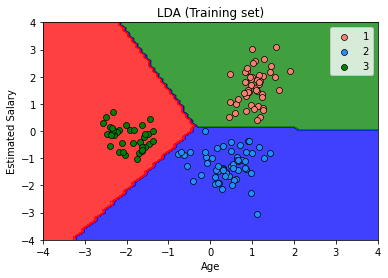

In [33]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train_lda, y_train
X1, X2 = np.meshgrid(np.arange(start=-4, stop=4.01, step=0.1),
                     np.arange(start=-4, stop=4.01, step=0.1))

Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('green', 'blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label=j, edgecolors='black', linewidth=0.7)

plt.title('LDA (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

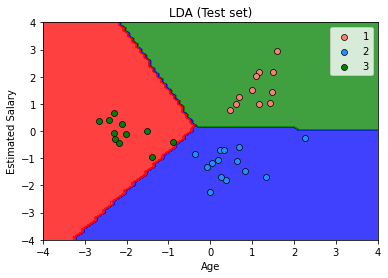

In [34]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test_lda, y_test
X1, X2 = np.meshgrid(np.arange(start=-4, stop=4.01, step=0.1),
                     np.arange(start=-4, stop=4.01, step=0.1))

Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('green', 'blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue', 'green'))(i), label=j, edgecolors='black', linewidth=0.7)

plt.title('LDA (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()